In [1]:
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import omicverse as ov


   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

Version: 1.6.5, Tutorials: https://omicverse.readthedocs.io/


In [2]:
adata = sc.read_h5ad("D:\labwork\macro_1.h5ad")
adata

AnnData object with n_obs × n_vars = 120169 × 2000
    obs: 'Dataset', 'Organ_origin', 'Sample', 'Patient', 'Tissue', 'Cancer type', 'cnv_status', 'Celltype', 'batch', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_genes', 'log2_nUMIs', 'log2_nGenes', 'leiden', 'leiden_res0_25', 'leiden_res0_5', 'leiden_res1', 'leiden_res2'
    var: 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_rank', 'variances', 'variances_norm'
    uns: 'batch_colors', 'counts|original|cum_sum_eigenvalues', 'counts|original|pca_var_ratios', 'dendrogram_leiden_res0_25', 'dendrogr

<AxesSubplot: title={'center': 'Resolution:0.25'}, xlabel='X_mde1', ylabel='X_mde2'>

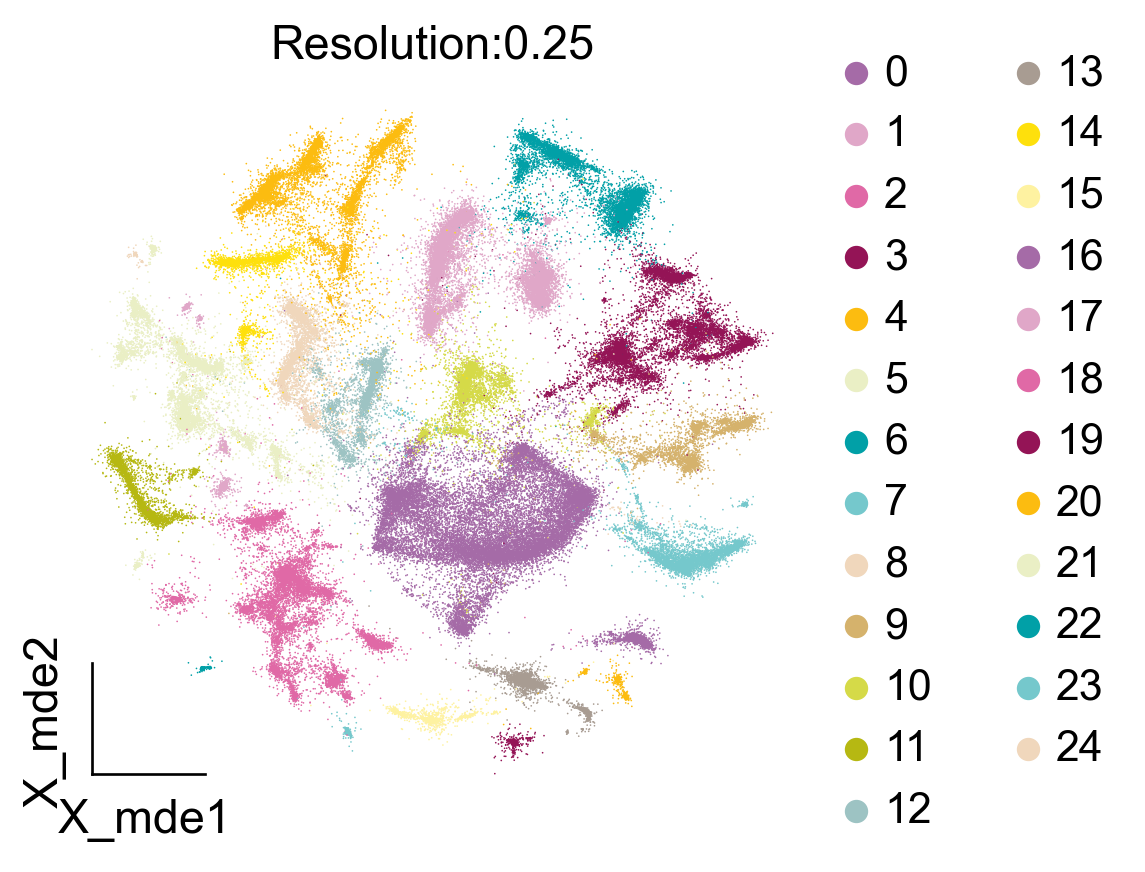

In [3]:
ov.utils.embedding(adata,
                basis='X_mde',color=["leiden_res0_25"],
                title=['Resolution:0.25'],
                palette=ov.palette()[12:],
                ncols=2,
                show=False,frameon='small',)

In [8]:
leiden_res = adata.obs['leiden_res0_25']

gene_names = adata.var.index

gene_expression_matrix = adata.to_df()
df = pd.DataFrame(gene_expression_matrix)

df['cluster'] = leiden_res.values

top_genes_per_cluster = df.groupby('cluster').apply(lambda x: x.mean(axis=1).nlargest(10))

for cluster, genes in top_genes_per_cluster.groupby(level=0):
    print(f"Cluster {cluster} top 10 genes:")
    print(genes.index.tolist())
    print()

MemoryError: Unable to allocate 917. MiB for an array with shape (120169, 2000) and data type float32

In [ ]:
dict1={
    'pDC':['CD68','MZB1','CXCR4','IL3RA'],
    'Mast_cell':['PTPRB','PECAM1'],
    'Epithelial':['KRT5','KRT14'],
    'Stromal':['RGS5','COL1A1'],
    'RBC' :['HBB'],
    'Hepatocyte':['MASP2','APOC3'],
    'Bcell':['CD79A','MZB1'],
    'Endothelial' :['VWF','LYVE1','CD14'],
    'Myeloid':['CD14','CD68','CLEC9A'],
    'TNKcell':['CD3E','XCL1','CXCR4','NKG7','CD8A'],
}

In [ ]:
#['CD163', 'CD1C', 'CLEC9A', 'FCGR3B', 'LILRB2', 'S100A12', 'TPSAB1']
dict1={
    'Fibroblast':['ACTA2'],
    'Endothelium':['PTPRB','PECAM1'],
    'Epithelium':['KRT5','KRT14'],
    'Mast cell':['KIT','CD63'],
    'Neutrophil' :['ITGAM'],
    'cDendritic cell':['FCER1A','CST3'],
    'pDendritic cell':['IL3RA','GZMB','SERPINF1','ITM2C'],
    'Monocyte' :['CD14','LYZ','S100A8','S100A9','LST1',],
    'Macrophage':['FCGR3A','CD163','CSF1R','CD68'],
    'B cell':['MS4A1','CD79A'],
    'Plasma cell':['MZB1','IGKC','JCHAIN'],
    'Proliferative signal':['MKI67','TOP2A','STMN1'],
    'NK/NKT cell':['GNLY','NKG7','KLRD1'],
    'T cell':['CD3D','CD3E'],
}

In [ ]:
smarker_genes = dict()
for ct, markers in dict1.items():
    markers_found = list()
    for marker in markers:
        if marker in adata.var.index:
            markers_found.append(marker)
    smarker_genes[ct] = markers_found
#del [] # remove the last marker
del_markers = list()
for ct, markers in smarker_genes.items():
    if markers==[]:
        del_markers.append(ct)
for ct in del_markers:
    del smarker_genes[ct]

smarker_genes

In [ ]:
from PIL import Image

sc.pl.dotplot(
    adata,
    groupby="leiden_res0_25",
    var_names=smarker_genes,  # type: ignore
    dendrogram=True,
    standard_scale="var",  # standard scale: normalize each gene to range from 0 to 1
    show=False
)

high_res_image_path = "dotplot_high_res.png"
plt.savefig(high_res_image_path, dpi=300)

plt.close()

with Image.open(high_res_image_path) as img:
    rotated_img = img.rotate(-90, expand=True)
    rotated_img.save("dotplot_high_res_rotated.png")
